In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%pylab inline
import seaborn as sbn

Populating the interactive namespace from numpy and matplotlib


In [3]:
#to see what dataset looks like
pd.read_csv("https://www.ncdc.noaa.gov/cag/time-series/us/30/USW00094728/tavg/ytd/12/1895-2016.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000")

,New York (Central Park),New York,Average Temperature,January-December
0,Units: Degrees Fahrenheit,NaN,NaN,NaN
1,Base Period: 1901-2000,NaN,NaN,NaN
2,Missing: -9999,NaN,NaN,NaN
3,Date,Value,Anomaly,NaN
4,189512,53.0,-1.2,NaN
5,189612,53.6,-0.6,NaN
6,189712,53.6,-0.6,NaN
7,189812,55.1,0.9,NaN
8,189912,54.0,-0.2,NaN
9,190012,54.2,0.0,NaN


In [4]:
dateparse = lambda Date: [pd.datetime.strptime(d, '%Y%m') for d in Date]

In [5]:
#import with correct datetime format
yearTemp=pd.read_csv("https://www.ncdc.noaa.gov/cag/time-series/us/30/USW00094728/tavg/ytd/12/1895-2016.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000", skiprows=(3),header=1, parse_dates=['Date'],date_parser=dateparse )

In [6]:
yearTemp['year'] = yearTemp.Date.dt.year
yearTemp.drop(['Date',"Value"] , axis=1, inplace=True)

In [7]:
yearTemp.head()

,Anomaly,year
0,-1.2,1895
1,-0.6,1896
2,-0.6,1897
3,0.9,1898
4,-0.2,1899


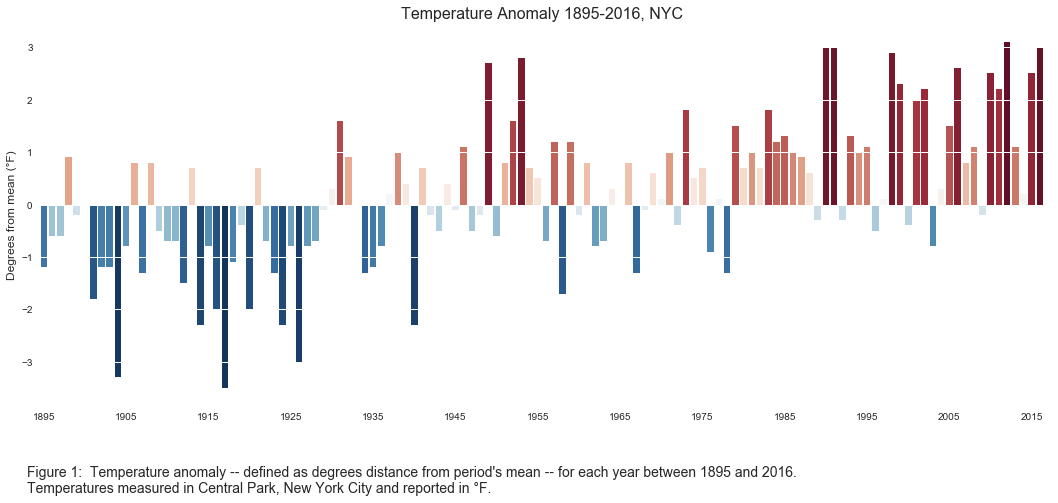

In [8]:
pl.figure(figsize=(18, 7))

sbn.set_style("white")
#set palette to change with magnitude of value
p = sbn.color_palette("RdBu_r", len(yearTemp))
rank = yearTemp.Anomaly.argsort().argsort()
fig = sbn.barplot(yearTemp.year,yearTemp.Anomaly, palette = np.array(p[::1])[rank])
xlabel("")
ylabel("Degrees from mean (°F)",fontsize=12)
pl.title("Temperature Anomaly 1895-2016, NYC",fontsize=16);

#remove unnecessary grid and axis
grid("off")
sbn.despine(left=True,bottom=True)

#fix x -axis to not show every year
xticks=fig.xaxis.get_major_ticks();
for i in range(len(xticks)):
    xticks[i].set_visible(False)
    if i%10==0:
        xticks[i].set_visible(True)
xticks[0].set_visible(True)

#add caption
txt='''
Figure 1:  Temperature anomaly -- defined as degrees distance from period's mean -- for each year between 1895 and 2016. 
Temperatures measured in Central Park, New York City and reported in °F. '''
fig.text(-2, -5.5, txt, ha='left',fontsize=14)

# create white x-axis grid lines and overlay
fig.yaxis.grid(color='white')
fig.set_axisbelow(False)

In [9]:
#x=np.arange(1,13,1)
#def mySparkline(dataFrame = newData, year = 2016):    
#    sparkline = plot(x,newData["Anomaly"][year])
#    axhline(y=0,c="black",alpha=0.2)
#    pl.axis('off');
#    pl.title(year ,loc="left",fontsize=9)
#    return sparkline